In [1]:
#1. Loading the Dataset

In [2]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('datacleaningchallenge.csv')

# Display the first few rows of the dataset
df.head()

,id,content,timestamp,username,userdisplayname,userlocation,retweetCount,likeCount,language,source
0,1641577900305530882,Great! Today I obtained my 4th course certific...,2023-03-30 23:07:25+00:00,CSC_Techy,Celestine Solomon,Nigeria,0,2,en,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
1,1641575661583101958,Finally done with the documentation of my FIFA...,2023-03-30 22:58:31+00:00,yemocute001,MeenahTHEanalyst,"Ibadan, Nigeria",2,4,en,"<a href=""http://twitter.com/download/android"" ..."
2,1641557232952172545,Finally able to finish the #DataCleaningchalle...,2023-03-30 21:45:17+00:00,3chibuike,Chukwubụikem,NaN,0,0,en,"<a href=""http://twitter.com/download/android"" ..."
3,1641545701367721984,I cleaned my first dataset!!! Thanks to @Promi...,2023-03-30 20:59:28+00:00,OlabuloD,_O.dhamie,"Lagos, Nigeria",4,11,en,"<a href=""http://twitter.com/download/iphone"" r..."
4,1641518161500446732,I was going through a data analyst portfolio r...,2023-03-30 19:10:02+00:00,femiodus_,Femi Odugbesan,"Abuja, Nigeria",3,8,en,"<a href=""http://twitter.com/download/android"" ..."


In [3]:
# 2. Word Cloud
# A word cloud is a visualization that shows the most frequent words in the dataset. The size of each word represents its frequency.

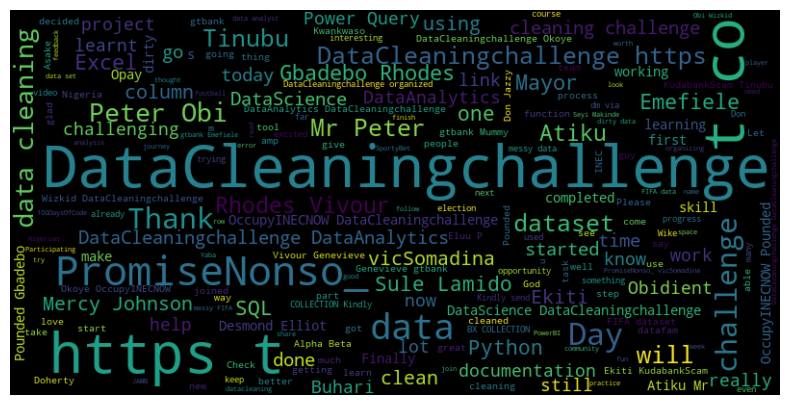

In [4]:
# Install the wordcloud library if not already installed
!pip install wordcloud

# Importing necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tweets into one large text for word cloud
text = ' '.join(df['content'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
# 3. Creating the Table with Different Stages of Preprocessing
# We will break down the preprocessing stages of each tweet:

# Tweet_punct: The tweet after removing punctuation.
# Tweet_tokenized: The tweet split into individual words (tokens).
# Tweet_nonstop: The tweet with stop words removed.
# Tweet_stemmed: The tweet with words stemmed (reduced to their root forms).
# Tweet_lemmatized: The tweet with words lemmatized (converted to base form considering the context).

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acadr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acadr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acadr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


      username                                            content  \
0    CSC_Techy  Great! Today I obtained my 4th course certific...   
1  yemocute001  Finally done with the documentation of my FIFA...   
2    3chibuike  Finally able to finish the #DataCleaningchalle...   
3     OlabuloD  I cleaned my first dataset!!! Thanks to @Promi...   
4    femiodus_  I was going through a data analyst portfolio r...   

                                         Tweet_punct  \
0  Great Today I obtained my 4th course certifica...   
1  Finally done with the documentation of my FIFA...   
2  Finally able to finish the DataCleaningchallen...   
3  I cleaned my first dataset Thanks to PromiseNo...   
4  I was going through a data analyst portfolio r...   

                                     Tweet_tokenized  \
0  [great, today, i, obtained, my, 4th, course, c...   
1  [finally, done, with, the, documentation, of, ...   
2  [finally, able, to, finish, the, datacleaningc...   
3  [i, cleaned, my, firs

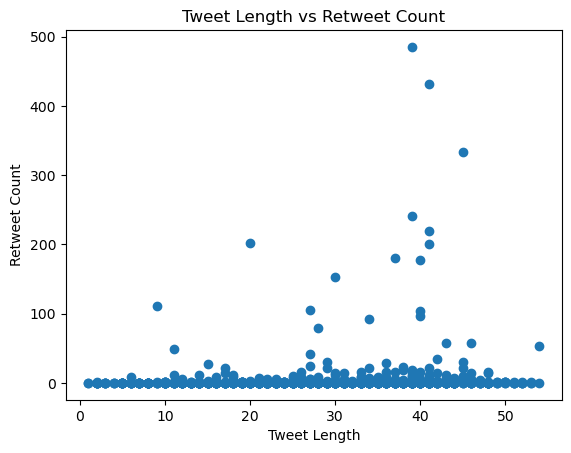

In [6]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Download NLTK data (only required the first time you run it)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your dataset
df = pd.read_csv('datacleaningchallenge.csv')

# Step 1: Data Preprocessing Functions

# Function to remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Tokenize the text
def tokenize(text):
    return word_tokenize(text.lower())

# Remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Stemming
stemmer = PorterStemmer()
def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Combined preprocessing function
def preprocess_tweet(tweet):
    tweet_punct = remove_punctuation(tweet)
    tweet_tokenized = tokenize(tweet_punct)
    tweet_nonstop = remove_stopwords(tweet_tokenized)
    tweet_stemmed = stem_words(tweet_nonstop)
    tweet_lemmatized = lemmatize_words(tweet_nonstop)
    return tweet_punct, tweet_tokenized, tweet_nonstop, tweet_stemmed, tweet_lemmatized

# Step 2: Apply preprocessing to the 'content' column
df[['Tweet_punct', 'Tweet_tokenized', 'Tweet_nonstop', 'Tweet_stemmed', 'Tweet_lemmatized']] = df['content'].apply(
    lambda x: pd.Series(preprocess_tweet(str(x)))
)

# Step 3: Display the new dataframe with preprocessing columns
print(df[['username', 'content', 'Tweet_punct', 'Tweet_tokenized', 'Tweet_nonstop', 'Tweet_stemmed', 'Tweet_lemmatized']].head())

# Step 5: Vectorization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the lemmatized tweets
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df['Tweet_lemmatized'].apply(lambda x: ' '.join(x)))

# Step 6: Feature Collection
# Creating a feature matrix from the dataset
df_features = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Step 7: Graph of Tweet Lengths and Retweets
df['tweet_length'] = df['content'].apply(lambda x: len(x.split()))
plt.scatter(df['tweet_length'], df['retweetCount'])
plt.title('Tweet Length vs Retweet Count')
plt.xlabel('Tweet Length')
plt.ylabel('Retweet Count')
plt.show()

In [7]:
# Vectorization
# Vectorization is the process of converting text data into numerical format so that machine learning algorithms can process it. We will use TF-IDF Vectorization, which gives more importance to words that are less frequent across the dataset but occur often in individual documents.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=100)

# Apply TF-IDF to the cleaned tweets (Tweet_lemmatized joined back as strings)
tfidf_matrix = vectorizer.fit_transform(df['Tweet_lemmatized'].apply(lambda x: ' '.join(x)))

# Convert TF-IDF matrix to a DataFrame for easier understanding
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF matrix
tfidf_df.head()

,alpha,amp,analysis,atiku,beta,better,buhari,challenge,challenging,clean,...,today,use,using,via,vicsomadina,vivour,wike,wizkid,work,working
0,0.0,0.0,0.374165,0.0,0.0,0.0,0.0,0.0,0.0,0.314318,...,0.345276,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.256256,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Feature Collection
# For machine learning, we need features to train the model. Here, we'll collect features based on the length of the tweet, the number of words, the number of unique words, etc.

In [10]:
# Calculate additional features: tweet_length, word_count, and unique_word_count
df['tweet_length'] = df['content'].apply(lambda x: len(x))  # Length of the tweet (number of characters)
df['word_count'] = df['content'].apply(lambda x: len(x.split()))  # Number of words in the tweet
df['unique_word_count'] = df['content'].apply(lambda x: len(set(x.split())))  # Number of unique words in the tweet

# Display the updated dataframe with the specified columns
df[['username', 'content', 'tweet_length', 'word_count', 'unique_word_count']].head()


,username,content,tweet_length,word_count,unique_word_count
0,CSC_Techy,Great! Today I obtained my 4th course certific...,295,34,31
1,yemocute001,Finally done with the documentation of my FIFA...,258,38,34
2,3chibuike,Finally able to finish the #DataCleaningchalle...,143,22,22
3,OlabuloD,I cleaned my first dataset!!! Thanks to @Promi...,268,41,34
4,femiodus_,I was going through a data analyst portfolio r...,217,30,28


In [11]:
# Graph: Visualizing Features
# Let's visualize the relationships between some of these features. For example, we'll plot the distribution of tweet lengths and the relationship between word count and unique word count.

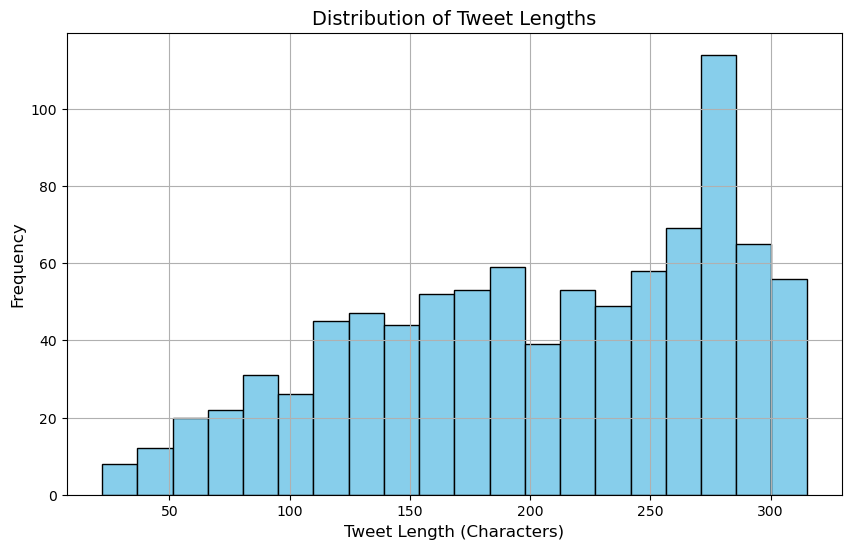

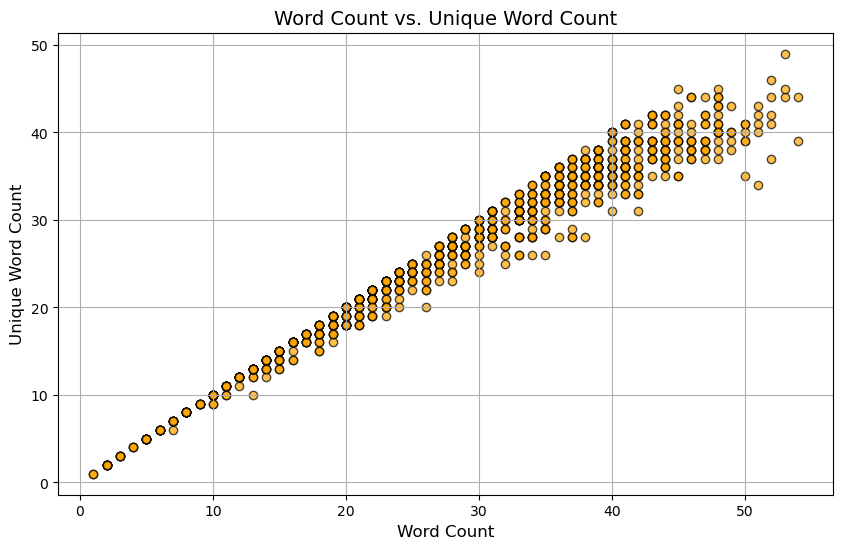

In [12]:
# Distribution of tweet lengths (number of characters in tweets)
plt.figure(figsize=(10, 6))
plt.hist(df['tweet_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Tweet Lengths', fontsize=14)
plt.xlabel('Tweet Length (Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Scatterplot of word count vs. unique word count
plt.figure(figsize=(10, 6))
plt.scatter(df['word_count'], df['unique_word_count'], color='orange', edgecolor='black', alpha=0.7)
plt.title('Word Count vs. Unique Word Count', fontsize=14)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Unique Word Count', fontsize=12)
plt.grid(True)
plt.show()

In [13]:
 # Identify hate speech and abusive words

      username                                            content  abusive
0    CSC_Techy  Great! Today I obtained my 4th course certific...        0
1  yemocute001  Finally done with the documentation of my FIFA...        0
2    3chibuike  Finally able to finish the #DataCleaningchalle...        0
3     OlabuloD  I cleaned my first dataset!!! Thanks to @Promi...        0
4    femiodus_  I was going through a data analyst portfolio r...        0


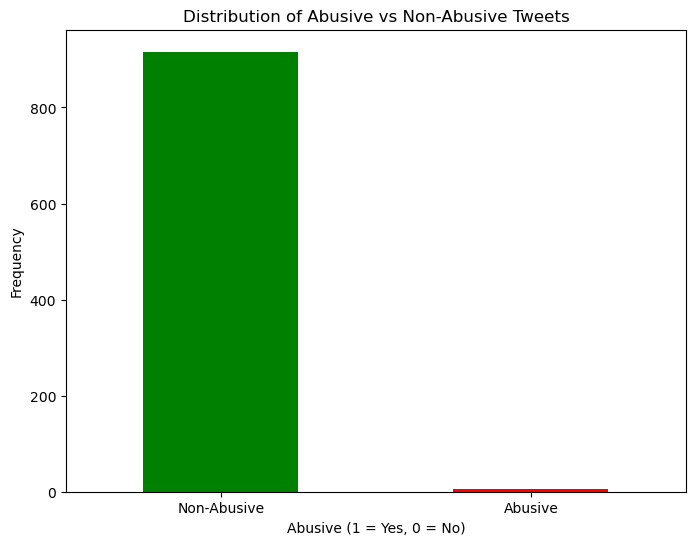

In [14]:
# Step 1: Define a list of hate speech and abusive words (custom dataset)
abusive_words = ['hate', 'stupid', 'idiot', 'fool', 'dumb', 'terrible', 'nonsense', 'ignorant', 'trash', 'ugly']

# Step 2: Create a function to identify if a tweet contains any abusive words
def contains_abusive_words(tweet, abusive_words):
    # Tokenize the tweet and convert to lowercase for case-insensitive matching
    tokens = word_tokenize(tweet.lower())
    # Check if any word in the tweet is in the abusive_words list
    return any(word in tokens for word in abusive_words)

# Step 3: Apply the function to each tweet in the 'content' column and create a new 'abusive' column
df['abusive'] = df['content'].apply(lambda x: 1 if contains_abusive_words(str(x), abusive_words) else 0)

# Step 4: Display the updated dataframe with the 'abusive' column
print(df[['username', 'content', 'abusive']].head())

# Step 5: Visualize the distribution of abusive vs non-abusive tweets
plt.figure(figsize=(8, 6))
df['abusive'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Abusive vs Non-Abusive Tweets')
plt.xlabel('Abusive (1 = Yes, 0 = No)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Abusive', 'Abusive'], rotation=0)
plt.show()